## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%matplotlib inline

## LOADING DATASET

In [2]:
df_cars=pd.read_excel("C:/Users/PRAVEEN/Desktop/New folder/cars.xlsx",skiprows=[0])
df_cars.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
1,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
2,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US
3,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,US
4,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,US


## PRE-PROCESSING AND EXPLORING DATA

In [3]:
df_cars.isnull(). sum ()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [4]:
df_cars.loc[~ df_cars.Horsepower.apply(np.isreal)]

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin


In [5]:
df_cars.loc[~df_cars.Horsepower.apply(np.isreal),'Horsepower']=np.nan

In [6]:
df_cars['Horsepower'].replace(0,np.nan , inplace=True )

In [7]:
df_cars.loc[13]

Model           plymouth duster
MPG                        22.0
Cylinders                     6
Displacement              198.0
Horsepower                 95.0
Weight                     2833
Acceleration               15.5
Year                         70
Origin                       US
Name: 13, dtype: object

In [8]:
df_cars['Horsepower']=df_cars['Horsepower'].fillna(df_cars ['Horsepower'].mean())

In [9]:
df_cars.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [10]:
df_cars.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

In [11]:
df_cars['Horsepower']=df_cars['Horsepower'].astype('int64')
df_cars.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

## EXPLORING DATA

In [12]:
df_cars.shape

(394, 9)

In [13]:
len(df_cars)

394

In [14]:
df_cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.467005,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.393108,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.250000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,94.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## NON-GRAPHICAL UNIVARIATE ANALYSIS

In [15]:
df_cars['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [16]:
df_cars['Cylinders'].value_counts()

Cylinders
4    201
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [17]:
df_4Cy=df_cars[(df_cars['Cylinders']==4)]
df_4Cy.describe()
               

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,201.000000,201.0,201.000000,201.000000,201.00000,201.000000,201.000000
mean,29.278607,4.0,109.828358,78.537313,2308.81592,16.597512,77.074627
std,5.671595,0.0,21.479796,14.675144,345.01703,2.387958,3.745584
min,18.000000,4.0,68.000000,46.000000,1613.00000,11.600000,70.000000
25%,25.000000,4.0,91.000000,68.000000,2050.00000,14.800000,74.000000
50%,28.400000,4.0,105.000000,78.000000,2234.00000,16.200000,78.000000
75%,33.000000,4.0,121.000000,89.000000,2565.00000,18.000000,80.000000
max,46.600000,4.0,156.000000,115.000000,3270.00000,24.800000,82.000000


## GRAPHICAL UNIVARIATE ANALYSIS

<Axes: >

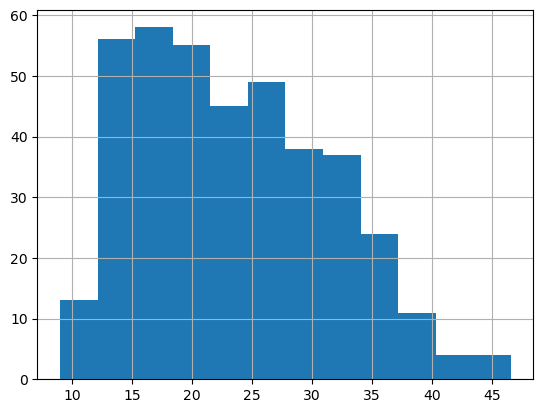

In [18]:
df_cars['MPG'].hist(bins=12)

C:\Users\PRAVEEN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_13704\4051416749.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x500 with 0 Axes>

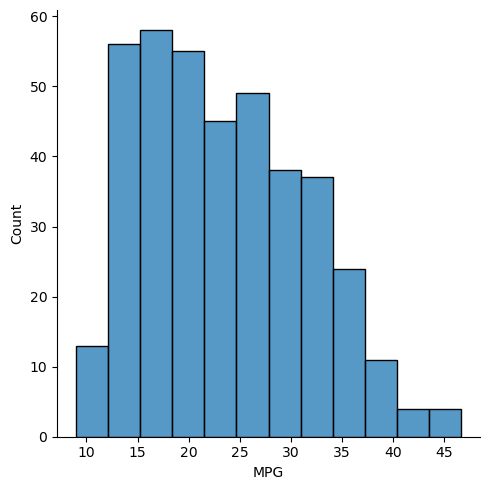

In [19]:
plt.figure(figsize=(8,5))
sns.displot(df_cars['MPG'])
plt.tight_layout()

### BOX PLOT

<Axes: >

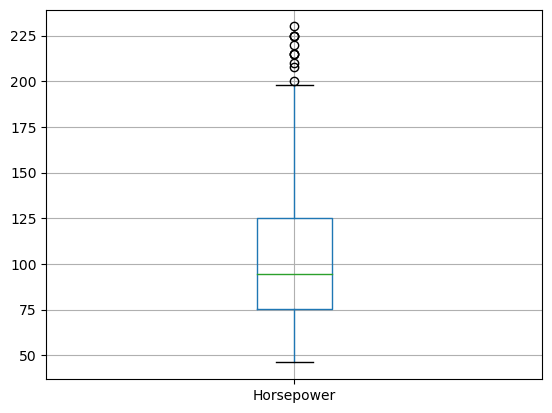

In [20]:
df_cars.boxplot(column='Horsepower')

<Axes: title={'center': 'Horsepower'}, xlabel='Cylinders'>

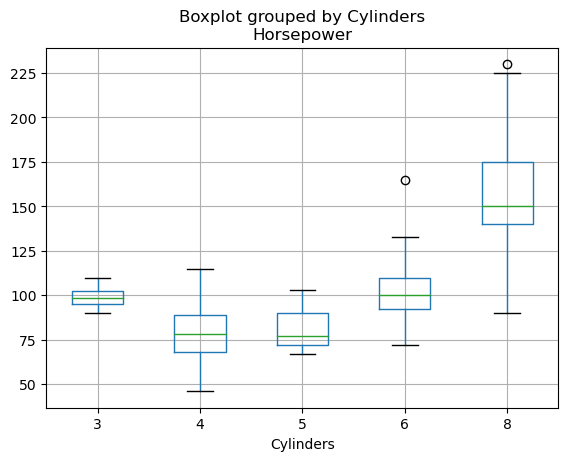

In [21]:
df_cars.boxplot(column='Horsepower',by='Cylinders')

### DEALING WITH OUTLIERS

#### REMOVING THE OUTLIERS FROM THE DATAFRAME

In [22]:
len(df_cars['Horsepower'])

394

In [23]:
upper=df_cars['Horsepower'].quantile(1-0.2)
upper

140.0

In [24]:
mask=(df_cars['Horsepower']<upper)

In [25]:
df_cars01=df_cars[mask]
len(df_cars01)

310

<Axes: xlabel='Horsepower'>

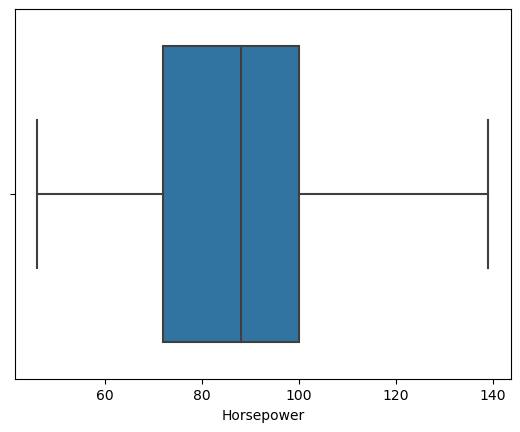

In [26]:
sns.boxplot(x=df_cars01['Horsepower'])

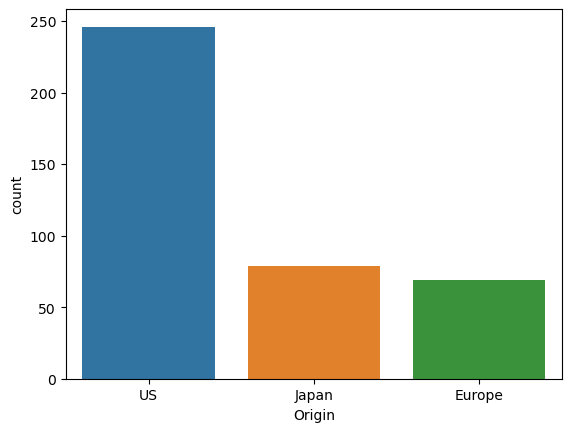

In [27]:
sns.countplot(x='Origin', data=df_cars)
plt.show()


### NON-GRAPHICAL BIVARIATE ANALYSIS

In [28]:
numeric_columns = df_cars.select_dtypes(include=['number'])
correlation_result = numeric_columns.corr()['MPG'].sort_values()

# Print or use the correlation result as needed
print(correlation_result)



Weight         -0.832279
Displacement   -0.805249
Cylinders      -0.777138
Horsepower     -0.776481
Acceleration    0.420574
Year            0.580384
MPG             1.000000
Name: MPG, dtype: float64


### GRAPHICAL BI-VARIATE ANALYSIS

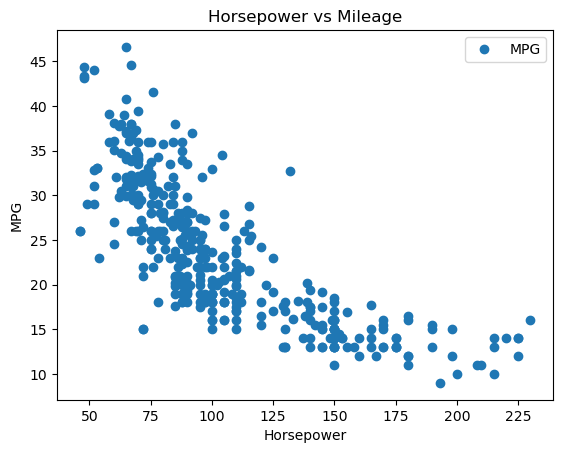

In [29]:
df_cars.plot(x='Horsepower',y='MPG', style='o')
plt.title('Horsepower vs Mileage')
plt.ylabel('MPG')
plt.xlabel('Horsepower')
plt.show()

#### SCATTER MATRIX PLOT

In [30]:
MPG=df_cars['MPG']

In [31]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

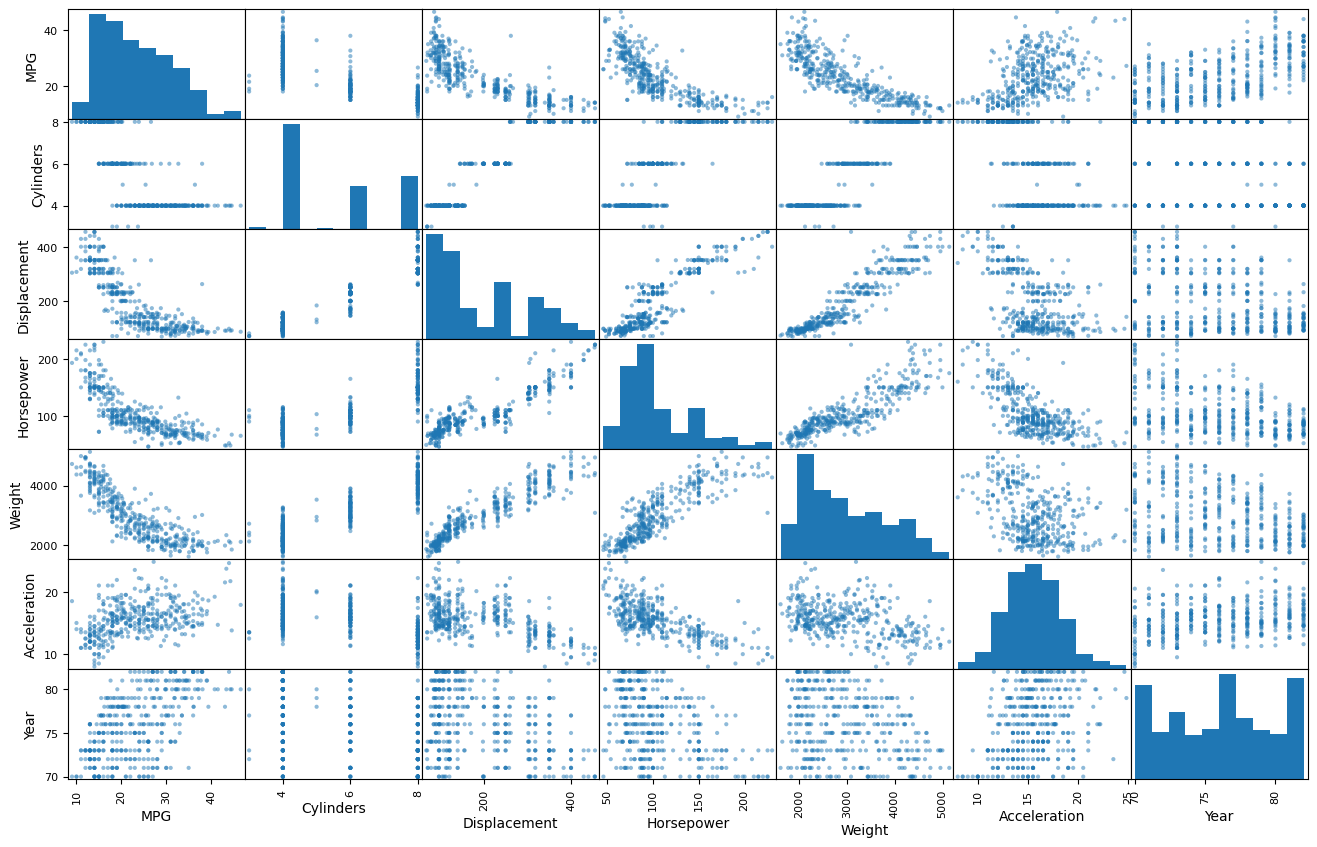

In [32]:
scatter_matrix(df_cars,figsize=(16,10),alpha=0.5,diagonal='hist')

## MACHINE LEARNING base run

### set up the data: Predicators & target variable 

In [33]:
df_cars=pd.get_dummies(df_cars,columns=['Origin'])

In [34]:
columns_to_consider=['Displacement','Horsepower','Weight','Acceleration','Year'
                     ,'Origin_Europe','Origin_Japan','Origin_US']

In [35]:
X=df_cars[columns_to_consider].values
y=df_cars['MPG'].values


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
X_test.shape

(79, 8)

### Define & train the model

In [38]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [39]:
X_test.shape

(79, 8)

In [48]:
columns_to_consider.append('Intercept')

In [49]:
columns_to_consider

['Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Year',
 'Origin_Europe',
 'Origin_Japan',
 'Origin_US',
 'Intercept']

In [50]:
coeff_df = pd.DataFrame({'Predicator':columns_to_consider,'Coefficient':np.append(regression_model.coef_,regression_model.intercept_)})

In [51]:
coeff_df

,Predicator,Coefficient
0,Displacement,0.011865
1,Horsepower,-0.027295
2,Weight,-0.006230
3,Acceleration,-0.027297
4,Year,0.748593
5,Origin_Europe,0.510211
6,Origin_Japan,1.035637
7,Origin_US,-1.545849
8,Intercept,-13.362967


### PREDICT OUTPUT

In [52]:
y_pred=regression_model.predict(X_test)

In [53]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df1=df.head(25)

### EVALUATE THE PERFORMANCE OF ALGORITHM

### Visual Comparison

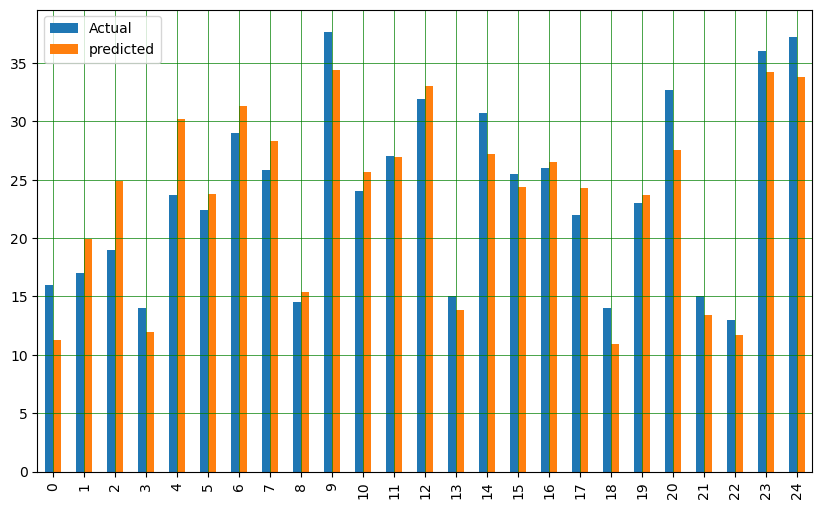

In [54]:
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major',linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':', linewidth='0.5',color='black')
plt.show()

#### %predictions with tolerance

In [55]:
df0=df.head(79)
df0.to_csv=("C:/Users/PRAVEEN/Desktop/cars.xls")
df0

,Actual,predicted
0,16.0,11.296577
1,17.0,19.958029
2,19.0,24.870550
3,14.0,11.980316
4,23.7,30.244031
...,...,...
74,14.0,12.626180
75,15.0,19.477442
76,11.0,9.240066
77,25.0,24.254697


### ROOT MEAN SQUARE ERROR(RMSE)

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.503389098623415
Mean Squared Error: 10.550587592996795
Root Mean Squared Error: 3.2481668049835117


## IMPROVISED PERFORMANCE- 1st approach-select only 4 cylinder data 

#### Visualize the data

In [57]:
df_4Cy.shape

(201, 9)

C:\Users\PRAVEEN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\PRAVEEN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\PRAVEEN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

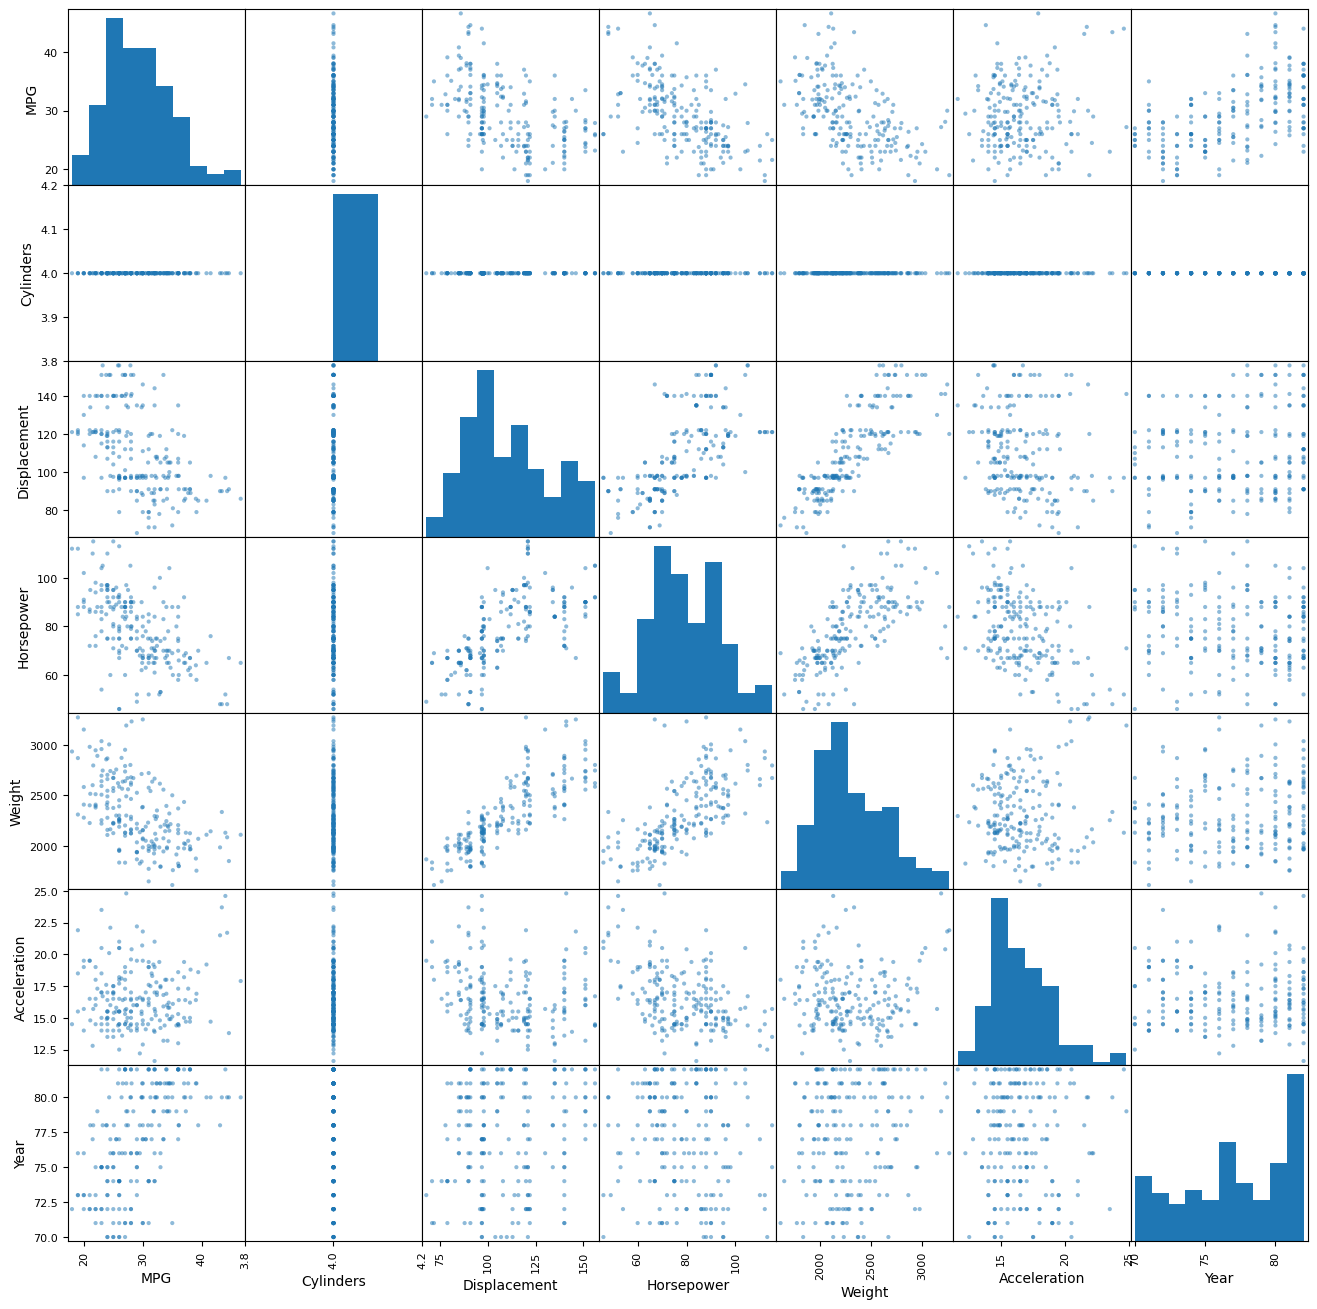

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_4Cy, figsize = (16,16),alpha = 0.5,diagonal = 'hist')

### Set up the data: Predictor and target variable

In [59]:
df_4Cy = pd.get_dummies(df_4Cy, columns=['Origin'])
columns_to_consider=['Displacement','Horsepower','Weight','Acceleration','Year'
                     ,'Origin_Europe','Origin_Japan','Origin_US']
X=df_4Cy[columns_to_consider].values
y=df_4Cy['MPG'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
len(y_test)
X_test.shape

(41, 8)

## Define & train the model

In [60]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)
columns_to_consider.append('Intercept')
columns_to_consider
coeff_df = pd.DataFrame({'Predicator':columns_to_consider,'Coefficient':np.append(regression_model.coef_,regression_model.intercept_)})
coeff_df

,Predicator,Coefficient
0,Displacement,-0.024912
1,Horsepower,-0.045888
2,Weight,-0.007248
3,Acceleration,0.023609
4,Year,0.943730
5,Origin_Europe,0.073671
6,Origin_Japan,0.465143
7,Origin_US,-0.538814
8,Intercept,-20.811241


## Predict output

In [61]:
y_pred = regression_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df1 = df.head(25)

### Evaluate the performance of Algorithm

#### visual Comparison

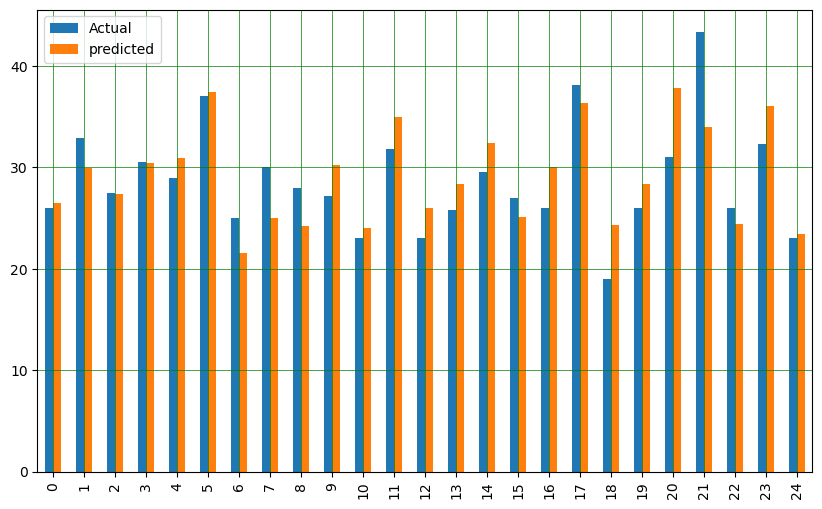

In [62]:
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major',linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':', linewidth='0.5',color='black')
plt.show()

### ROOT MEAN SQUARE ERROR(RMSE)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.632112511765664
Mean Squared Error: 11.463716122484888
Root Mean Squared Error: 3.3858109992267567


### IMPROVISED PERFORMANCE- 2nd approach-Train with more samples

### Creating predictor(input variable) & Label(output variable)

#### Load & prepare Data

In [64]:
df_4dum=pd.read_excel("C:/Users/PRAVEEN/Desktop/New folder/dummy_cars.xlsx",skiprows=[0])
df_4dum.shape

(203, 9)

In [65]:
df_4dum.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [66]:
df_4dum['Horsepower']=df_4dum['Horsepower'].fillna(df_4dum['Horsepower'].mean())
df_4dum.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

### Visualize the data

array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

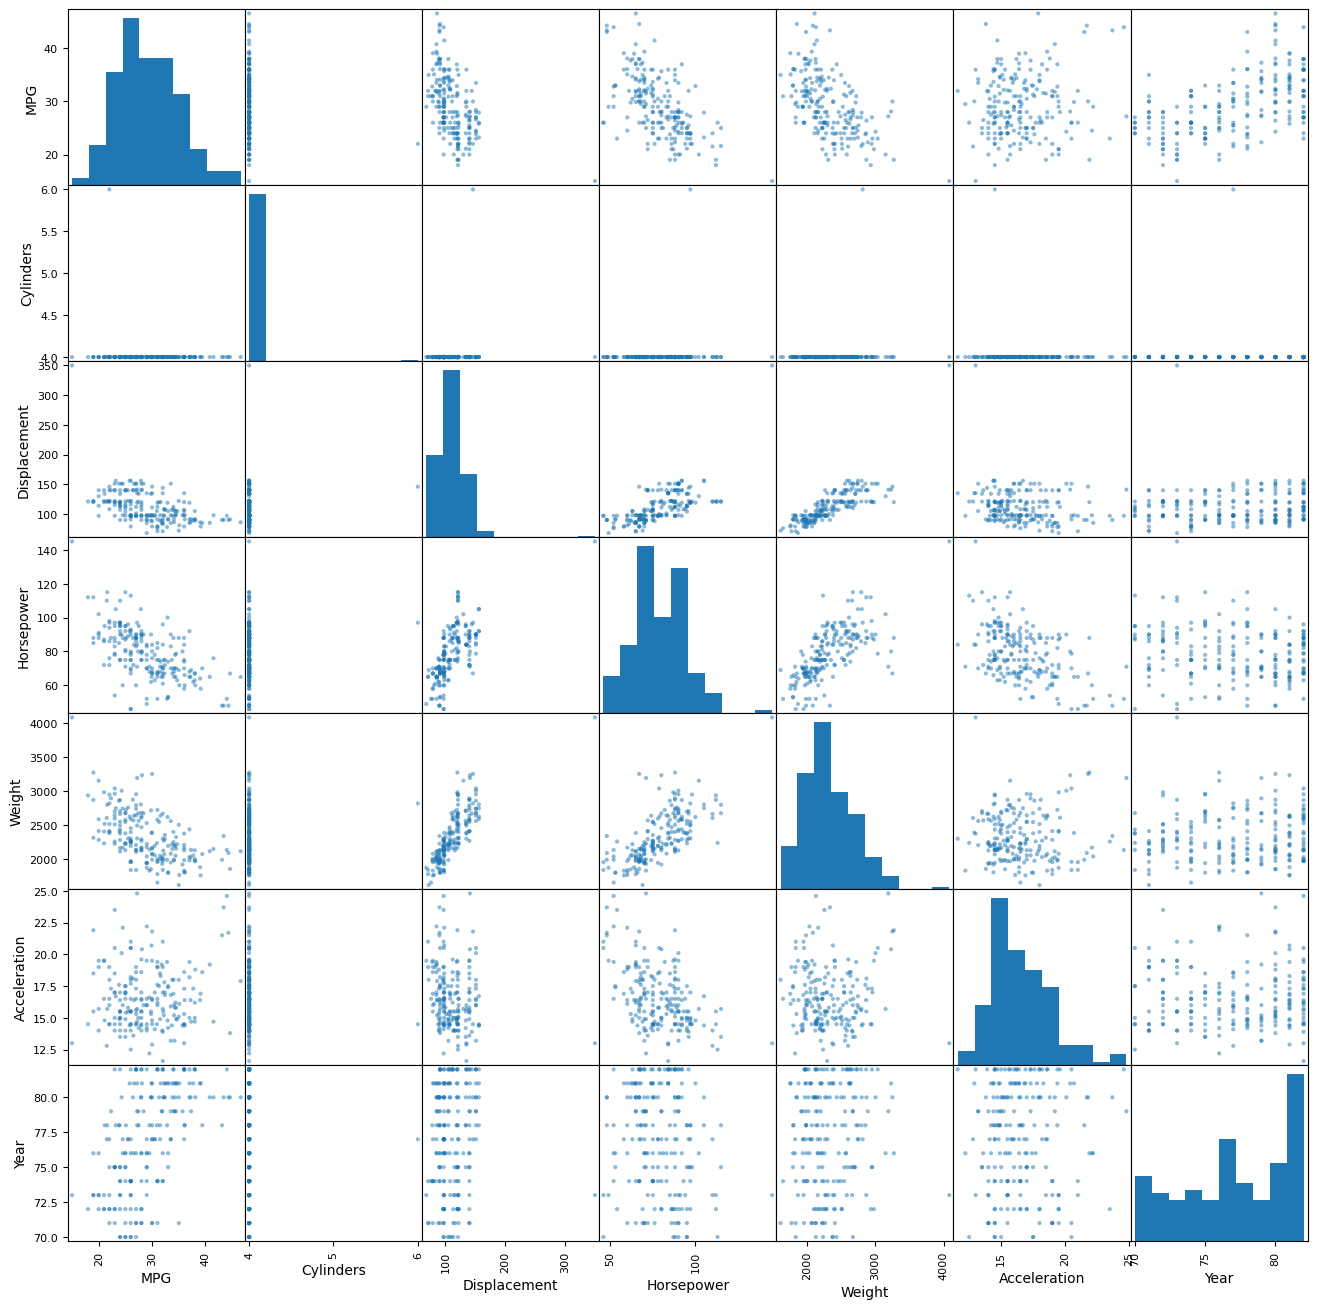

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_4dum, figsize=(16, 16), alpha=0.5, diagonal='hist')


## Define & Train the model

In [68]:
df_4dum = pd.get_dummies(df_4dum, columns=['Origin'])
columns_to_consider=['Displacement','Horsepower','Weight','Acceleration','Year'
                     ,'Origin_Europe','Origin_Japan','Origin_US']
X=df_4dum[columns_to_consider].values
y=df_4dum['MPG'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
len(y_test)
X_test.shape

(41, 8)

### Predict output

In [69]:
import pandas as pd
import numpy as np

columns_to_consider = ['Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_US', 'Intercept']
coefficients = np.array([-0.024912, -0.045888, -0.007248, 0.023609, 0.943730, 0.073671, 0.465143, -0.538814, -20.811241])

if len(columns_to_consider) == len(coefficients):
    coeff_df = pd.DataFrame({
        'Predictor': columns_to_consider,
        'Coefficient': coefficients
    })
else:
    print("Error: Length mismatch between feature list and coefficients")

print(coeff_df)


       Predictor  Coefficient
0   Displacement    -0.024912
1     Horsepower    -0.045888
2         Weight    -0.007248
3   Acceleration     0.023609
4           Year     0.943730
5  Origin_Europe     0.073671
6   Origin_Japan     0.465143
7      Origin_US    -0.538814
8      Intercept   -20.811241


In [70]:
y_pred = regression_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test,'predicted':y_pred})
df1 = df.head(25)  

## Evaluate the performance of Algorithm

### Visual Comparison

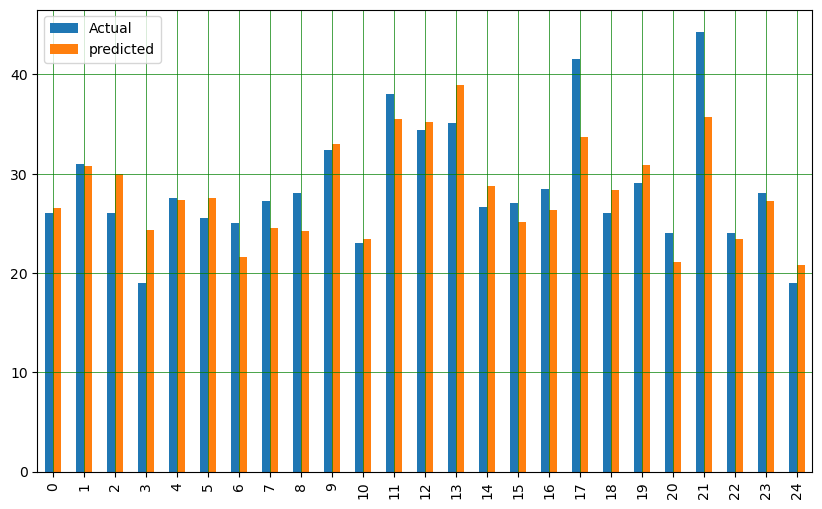

In [71]:
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major',linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':', linewidth='0.5',color='black')
plt.show()

### %predictions within tolerance

In [72]:
df1 = df.head(80)
df1.to_csv("C:/Users/PRAVEEN/Desktop/New folder/dummy_cars")
df1

,Actual,predicted
0,26.0,26.490427
1,31.0,30.763007
2,26.0,29.990255
3,19.0,24.297161
4,27.5,27.348513
5,25.5,27.568964
6,25.0,21.573286
7,27.2,24.511927
8,28.0,24.191291
9,32.4,32.986991


### Root Mean Square Error(RMSE)

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.3611002982885045
Mean Squared Error: 9.644013579452919
Root Mean Squared Error: 3.1054812154403573


## CONCLUSION